# PyCon 2018: Using pandas for Better (and Worse) Data Science

### GitHub repository: https://github.com/justmarkham/pycon-2018-tutorial

### Instructor: Kevin Markham

- GitHub: https://github.com/justmarkham
- Twitter: https://twitter.com/justmarkham
- YouTube: https://www.youtube.com/dataschool
- Website: http://www.dataschool.io

In [1]:
import pandas as pd
pd.__version__

'0.23.4'

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset: Stanford Open Policing Project  ([video](https://www.youtube.com/watch?v=hl-TGI4550M&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=1))

https://openpolicing.stanford.edu/

In [267]:
# ri stands for Rhode Island
ri = pd.read_csv('police.csv')

In [6]:
# what does each row represent?
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [7]:
# what do these numbers mean?
ri.shape

(91741, 15)

In [8]:
# what do these types mean?
ri.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

- What does NaN mean?
- Why might a value be missing?
- Why mark it as NaN? Why not mark it as a 0 or an empty string or a string saying "Unknown"?

In [9]:
# what are these counts? how does this work?
ri.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [10]:
(True == 1) and (False == 0)

True

## 1. Remove the column that only contains missing values ([video](https://www.youtube.com/watch?v=TW5RqdDBasg&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=2))

In [11]:
# axis=1 also works, inplace is False by default, inplace=True avoids assignment statement
ri.drop('county_name', axis='columns', inplace=True)

In [12]:
ri.shape

(91741, 14)

In [13]:
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [14]:
# alternative method
ri.dropna(axis='columns', how='all').shape

(91741, 14)

Lessons:

- Pay attention to default arguments
- Check your work
- There is more than one way to do everything in pandas

## 2. Do men or women speed more often? ([video](https://www.youtube.com/watch?v=d0oBRIONOEw&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=3))

In [15]:
# when someone is stopped for speeding, how often is it a man or woman?
ri[ri.violation == 'Speeding'].driver_gender.value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [16]:
# alternative
ri.loc[ri.violation == 'Speeding', 'driver_gender'].value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [17]:
# when a man is pulled over, how often is it for speeding?
ri[ri.driver_gender == 'M'].violation.value_counts(normalize=True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [18]:
# repeat for women
ri[ri.driver_gender == 'F'].violation.value_counts(normalize=True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

In [19]:
# combines the two lines above
ri.groupby('driver_gender').violation.value_counts(normalize=True)

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

What are some relevant facts that we don't know?

Lessons:

- There is more than one way to understand a question

## 3. Does gender affect who gets searched during a stop? ([video](https://www.youtube.com/watch?v=WzpGq1X5U1M&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=4))

In [20]:
# ignore gender for the moment
ri.search_conducted.value_counts(normalize=True)

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [21]:
# how does this work?
ri.search_conducted.mean()

0.03483720473942948

Because the column of search_conducted is a series of True and False values, and these are booleans, taking the mean of the column will return the mean of the 1's and 0's. True == 1, False == 0. True (or 1) indicates that a search WAS conducted. So the mean of the 1's and 0's turns out to be the same as the percentage of time that a search was conducted during a traffic stop.  

However, we have no idea what the probable cause may be. Men may be meaner when they are pulled over. 

You need more information. For example, a vehicle search is conducted any time a car is out of registration. It may be that men are in registration violation more often than women, which is why they get searched more often. Since resitration violations and vehicle searches are correlated, we have to consider this. 


We can help answer this if we examine the rate of searches assocated with each violation. 

In [22]:
ri.groupby(['driver_gender','violation']).search_conducted.mean()

driver_gender  violation          
F              Equipment              0.042622
               Moving violation       0.036205
               Other                  0.056522
               Registration/plates    0.066140
               Seat belt              0.012598
               Speeding               0.008720
M              Equipment              0.070081
               Moving violation       0.059831
               Other                  0.047146
               Registration/plates    0.110376
               Seat belt              0.037980
               Speeding               0.024925
Name: search_conducted, dtype: float64

In [23]:
# This layout makes more sense. 
ri.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

In [24]:
# search rate by gender
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

Does this prove that gender affects who gets searched?
Yes. Men are more likely to get searched, by a factor of 2. I.e., Men are twice as likely to get searched. 

In [25]:
# include a second factor
ri.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

In [26]:
import numpy as np

In [27]:
ri.groupby(['violation', 'driver_gender']).search_conducted.apply(np.mean)

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

In [28]:
ri.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

In [29]:
ri.groupby(['violation', 'driver_gender']).search_conducted.apply(np.mean)

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

Does this prove causation?

Lessons:

- Causation is difficult to conclude, so focus on relationships
- Include all relevant factors when studying a relationship

## 4. Why is search_type missing so often? ([video](https://www.youtube.com/watch?v=3D6smaE9c-g&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=5))

In [30]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

search_type is missing 88545 times, but that is because search_conducted = False for the same number. I.e., no search was done. 

In [31]:
# maybe search_type is missing any time search_conducted is False?
ri.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [32]:
ri[ri.search_conducted == False].search_conducted.sum() # all are False, so sum is 0

0

In [33]:
# test that theory, why is the Series empty?
ri[ri.search_conducted == False].search_type.value_counts()

Series([], Name: search_type, dtype: int64)

NA's are dropped in Panda's methods. Where there is NA, value_counts drops null values by default. 
This is why it is empty. 

In [34]:
# value_counts ignores missing values by default
ri[ri.search_conducted == False].search_type.value_counts(dropna=False)

NaN    88545
Name: search_type, dtype: int64

In [35]:
# when search_conducted is True, search_type is never missing
ri[ri.search_conducted == True].search_type.value_counts(dropna=False)

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Incident to Arrest,Inventory,Protective Frisk                 11
Inventory,Protective Frisk                                    11
Protective Frisk,Reasonab

In [36]:
# alternative
ri[ri.search_conducted == True].search_type.isnull().sum()

0

Lessons:

- Verify your assumptions about your data
- pandas functions ignore missing values by default

## 5. During a search, how often is the driver frisked? ([video](https://www.youtube.com/watch?v=4tTO_xH4aQE&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=6))

In [37]:
# multiple types are separated by commas
ri.search_type.value_counts(dropna=False)

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Probable Cause,Protective Frisk                                33
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Incident to Arrest,Inventory,Protective Frisk                  11
Protective

---
---

In [38]:
frisk = 'Protective Frisk'
boolean = [frisk in str(searchtype) for searchtype in ri.search_type]
boolean = pd.Series(boolean)
ri[boolean].shape
#  OR
ri.search_type.str.contains('Protective Frisk').sum()

274

In [39]:
# NaN are the NaN's
# False are when the search type string does not contain what you are looking for.
# True is when the search type DOES contain what you are looking for. 
# If you sum this list, NaN's are ignored, False's are 0's and True's are 1's. 
# Since we only care about the 1's, this mehtod works. 
ri.search_type.str.contains('Protective Frisk')

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24       True
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
         ... 
91711     NaN
91712     NaN
91713     NaN
91714     NaN
91715     NaN
91716     NaN
91717     NaN
91718     NaN
91719     NaN
91720     NaN
91721     NaN
91722     NaN
91723     NaN
91724     NaN
91725     NaN
91726     NaN
91727     NaN
91728     NaN
91729     NaN
91730     NaN
91731     NaN
91732     NaN
91733     NaN
91734     NaN
91735     NaN
91736     NaN
91737     NaN
91738     NaN
91739     NaN
91740     NaN
Name: search_type, Length: 91741, dtype: object

In [40]:
# This also works, but it returns both counts for False and True. 
ri.search_type.str.contains('Protective Frisk').value_counts()

False    2922
True      274
Name: search_type, dtype: int64

In [41]:
# This returns only the True's
ri.search_type.str.contains('Protective Frisk').value_counts()[True]

274

In [42]:
# In this case, the NaN's are not ignored. They need to be replaced with False.
# the inside is a boolean then, so we can use it to make a new ri dataframe that
# only contains True values, when 'Protective Frisk' is within search type.
ri[ri.search_type.str.contains('Protective Frisk').replace(np.nan, False)].shape

(274, 14)

In [43]:
ri[ri.search_type.str.contains('Protective Frisk').replace(np.nan, False)].shape

(274, 14)

In [44]:
ri.search_type.str.contains('Protective Frisk').value_counts().notnull

<bound method Series.notnull of False    2922
True      274
Name: search_type, dtype: int64>

---
---

In [45]:
# use bracket notation when creating a column
ri['frisk'] = ri.search_type == 'Protective Frisk'

In [46]:
ri.frisk.dtype

dtype('bool')

In [47]:
# includes exact matches only
ri.frisk.sum()

161

In [48]:
# is this the answer?
ri.frisk.mean()

0.0017549405391264537

In [49]:
# uses the wrong denominator (includes stops that didn't involve a search)
ri.frisk.value_counts()

False    91580
True       161
Name: frisk, dtype: int64

In [50]:
161 / (91580 + 161)

0.0017549405391264537

In [51]:
# includes partial matches
ri['frisk'] = ri.search_type.str.contains('Protective Frisk')

In [52]:
# seems about right
ri.frisk.sum()

274

In [53]:
# frisk rate during a search
ri.frisk.mean()

0.08573216520650813

8.5 percent of the time frisks happen during a vehicle search

mean ignores NaN's 

False's are ignored

True's are 1's

In [54]:
# str.contains preserved missing values from search_type
ri.frisk.value_counts(dropna=False)

NaN      88545
False     2922
True       274
Name: frisk, dtype: int64

In [55]:
# excludes stops that didn't involve a search
274 / (2922 + 274)

0.08573216520650813

In [56]:
ri.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,NaN
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN


Lessons:

- Use string methods to find partial matches
- Use the correct denominator when calculating rates
- pandas calculations ignore missing values
- Apply the "smell test" to your results

## 6. Which year had the least number of stops? ([video](https://www.youtube.com/watch?v=W0zGzXQmE7c&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=7))

---
---

## There are a few ways to do this:

#### Without having to convert the stop_date data type to date time in the original data frame. 

In [57]:
# This one takes a LOT of time!!!
# This makes a temporary copy of ri data frame, 
#   converts the stop_date to date_time using pd.to_datetime, 
#   and then accesses the value_counts. 
#   It then throws away the temporary data frame. 
ri.stop_date.apply(pd.to_datetime).dt.year.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [58]:
# this works, but there's a better way
ri.stop_date.str.slice(0,4).value_counts() # capturing only the year

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

#### Changing the stop_data data type (dtype) to datetime

In [59]:
ri['stop_date'] = pd.to_datetime(ri.stop_date)

In [60]:
ri.dtypes

stop_date             datetime64[ns]
stop_time                     object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
frisk                         object
dtype: object

In [61]:
ri.stop_date.dt.year.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [62]:
# convert dtype back to object so that I can do his code.
# Be careful doing this. If you had used object instead of str, the time elements would have been
#   added onto the end of the date.   00:00:00
#   That would not have restored the original state. Str does, and it's still an 'object' dtype. 
ri.stop_date.astype(str, inplace=True).head()

0    2005-01-02
1    2005-01-18
2    2005-01-23
3    2005-02-20
4    2005-03-14
Name: stop_date, dtype: object

---
---

In [63]:
ri.stop_date.astype(str, inplace=True).head()

0    2005-01-02
1    2005-01-18
2    2005-01-23
3    2005-02-20
4    2005-03-14
Name: stop_date, dtype: object

In [64]:
ri.dtypes

stop_date             datetime64[ns]
stop_time                     object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
frisk                         object
dtype: object

In [65]:
ri.stop_date = ri.stop_date.astype(str)

In [66]:
ri.dtypes

stop_date              object
stop_time              object
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
frisk                  object
dtype: object

In [67]:
# Without having to convert the date time, this works. 
# this works, but there's a better way
ri.stop_date.str.slice(0,4).value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [68]:
ri.stop_date.str

My Way:
    
    ri['stop_date'] = pd.to_datetime(ri.stop_date)

In [69]:
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')

In [70]:
combined.head()

0    2005-01-02 01:55
1    2005-01-18 08:15
2    2005-01-23 23:15
3    2005-02-20 17:15
4    2005-03-14 10:00
Name: stop_date, dtype: object

In [71]:
# make sure you create this column
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)

In [72]:
ri.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
frisk                         object
stop_datetime         datetime64[ns]
dtype: object

In [73]:
# why is 2005 so much smaller?
ri.stop_datetime.dt.year.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_datetime, dtype: int64

In [74]:
ri.stop_datetime.min()  # started on Jan 2nd 2005

Timestamp('2005-01-02 01:55:00')

Lessons:

- Consider removing chunks of data that may be biased
- Use the datetime data type for dates and times

## 7. How does drug activity change by time of day? ([video](https://www.youtube.com/watch?v=jV24N7SPXEU&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=8))

In [75]:
ri.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-02 01:55:00
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-18 08:15:00
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-23 23:15:00
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,NaN,2005-02-20 17:15:00
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-03-14 10:00:00


/Users/kimzoldak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


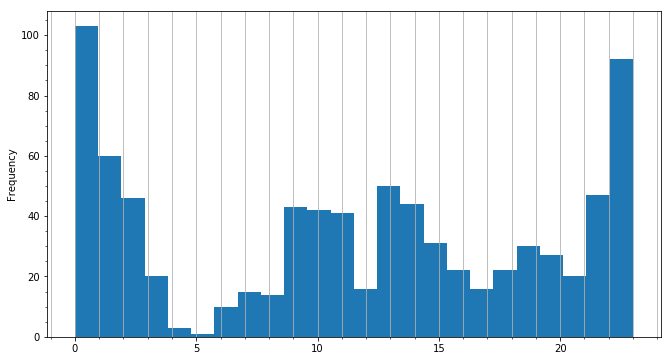

0     103
1      60
2      46
3      20
4       3
5       1
6      10
7      15
8      14
9      43
10     42
11     41
12     16
13     50
14     44
15     31
16     22
17     16
18     22
19     30
20     27
21     20
22     47
23     92
Name: stop_time, dtype: int64

In [76]:
drugs = ri.loc[ri.drugs_related_stop == True, :]
drugs['stop_time'] = pd.to_datetime(drugs.stop_time)

plt.figure(figsize=(11,6))
drugs.stop_time.dt.hour.plot(kind='hist', bins=24)  # this is what we want
plt.grid(which='both', axis='x', alpha=1)
plt.minorticks_on()
plt.show()

drugs.stop_time.dt.hour.value_counts().sort_index()

---
---

In [77]:
ri.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-02 01:55:00
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-18 08:15:00
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-23 23:15:00
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,NaN,2005-02-20 17:15:00
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-03-14 10:00:00


In [78]:
len(ri.loc[ri.drugs_related_stop == True, :])

815

In [79]:
ri.drugs_related_stop.dtype

dtype('bool')

In [80]:
# baseline rate
ri.drugs_related_stop.mean()

0.008883705213590434

In [81]:
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean()

stop_datetime
0     0.019728
1     0.013507
2     0.015462
3     0.017065
4     0.011811
5     0.004762
6     0.003040
7     0.003281
8     0.002687
9     0.006288
10    0.005714
11    0.006976
12    0.004467
13    0.010326
14    0.007810
15    0.006416
16    0.005723
17    0.005517
18    0.010148
19    0.011596
20    0.008084
21    0.013342
22    0.013533
23    0.016344
Name: drugs_related_stop, dtype: float64

In [82]:
k = ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.sum()

In [83]:
?plt.bar

Text(0.5, 0, 'Time (hour)')

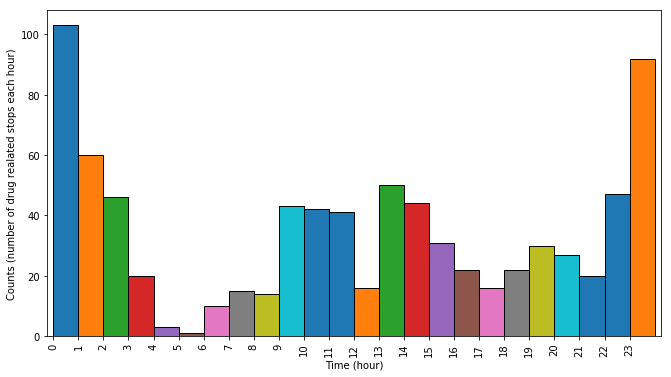

In [84]:
# Although they don't ask for a histogram plot, I plotted it anyhow. 
# This is histogram format is WRONG! Look at the X-axis. 

plt.figure(figsize=(11,6))
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.sum().plot(kind='bar', width=1, 
                                                                   align='edge', edgecolor='k')
#ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.sum().plot(kind='bar', width=1, align='edge', 
#                                                                   color='grey', edgecolor='k', alpha=0.5)

plt.ylabel('Counts (number of drug realated stops each hour)')
plt.xlabel('Time (hour)')


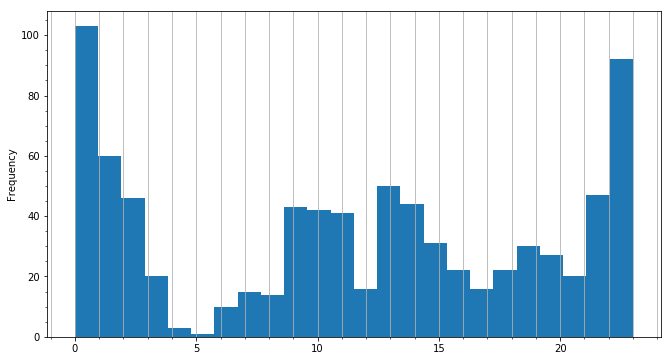

0     103
1      60
2      46
3      20
4       3
5       1
6      10
7      15
8      14
9      43
10     42
11     41
12     16
13     50
14     44
15     31
16     22
17     16
18     22
19     30
20     27
21     20
22     47
23     92
Name: stop_time, dtype: int64

In [85]:
plt.figure(figsize=(11,6))
drugs.stop_time.dt.hour.plot(kind='hist', bins=24)  # this is what we want
plt.grid(which='both', axis='x', alpha=1)
plt.minorticks_on()
plt.show()

drugs.stop_time.dt.hour.value_counts().sort_index()

In [86]:
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.sum().sort_index()

stop_datetime
0     103.0
1      60.0
2      46.0
3      20.0
4       3.0
5       1.0
6      10.0
7      15.0
8      14.0
9      43.0
10     42.0
11     41.0
12     16.0
13     50.0
14     44.0
15     31.0
16     22.0
17     16.0
18     22.0
19     30.0
20     27.0
21     20.0
22     47.0
23     92.0
Name: drugs_related_stop, dtype: float64

Text(0.5, 0, 'Time (hour)')

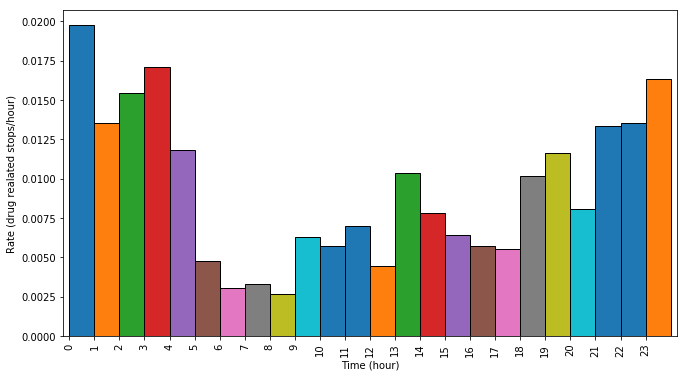

In [483]:
plt.figure(figsize=(11,6))
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean().plot(kind='bar', width=1, 
                                                                   align='edge', edgecolor='k')
plt.ylabel('Rate (drug realated stops/hour)')
plt.xlabel('Time (hour)')

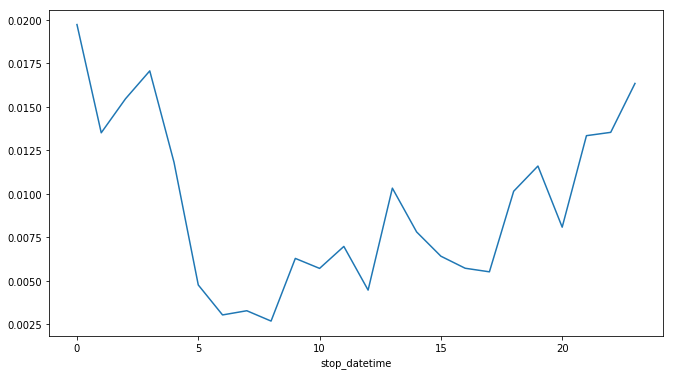

In [88]:
plt.figure(figsize=(11,6))
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean().plot()

In [89]:
# BY COUNTS
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.sum()

stop_datetime
0     103.0
1      60.0
2      46.0
3      20.0
4       3.0
5       1.0
6      10.0
7      15.0
8      14.0
9      43.0
10     42.0
11     41.0
12     16.0
13     50.0
14     44.0
15     31.0
16     22.0
17     16.0
18     22.0
19     30.0
20     27.0
21     20.0
22     47.0
23     92.0
Name: drugs_related_stop, dtype: float64

In [90]:
# BY RATE
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean()

stop_datetime
0     0.019728
1     0.013507
2     0.015462
3     0.017065
4     0.011811
5     0.004762
6     0.003040
7     0.003281
8     0.002687
9     0.006288
10    0.005714
11    0.006976
12    0.004467
13    0.010326
14    0.007810
15    0.006416
16    0.005723
17    0.005517
18    0.010148
19    0.011596
20    0.008084
21    0.013342
22    0.013533
23    0.016344
Name: drugs_related_stop, dtype: float64

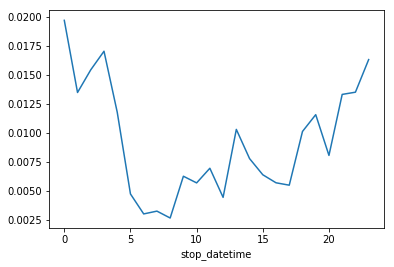

In [91]:
# line plot by default (for a Series)
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean().plot()

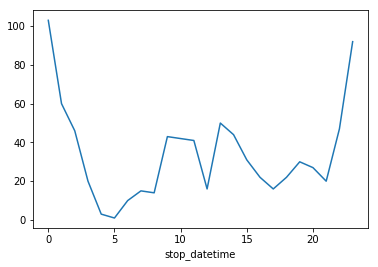

In [92]:
# alternative: count drug-related stops by hour
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.sum().plot()

Lessons:

- Use plots to help you understand trends
- Create exploratory plots using pandas one-liners

## 8. Do most stops occur at night? ([video](https://www.youtube.com/watch?v=GsQ6x3pt2w4&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=9))

In [93]:
ri.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-02 01:55:00
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-18 08:15:00
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-23 23:15:00
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,NaN,2005-02-20 17:15:00
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-03-14 10:00:00


In [110]:
ri['dummy'] = True

In [112]:
ri.groupby(ri.stop_datetime.dt.hour).dummy.sum()

stop_datetime
0     5221.0
1     4442.0
2     2975.0
3     1172.0
4      254.0
5      210.0
6     3290.0
7     4572.0
8     5210.0
9     6838.0
10    7350.0
11    5877.0
12    3582.0
13    4842.0
14    5634.0
15    4832.0
16    3844.0
17    2900.0
18    2168.0
19    2587.0
20    3340.0
21    1499.0
22    3473.0
23    5629.0
Name: dummy, dtype: float64

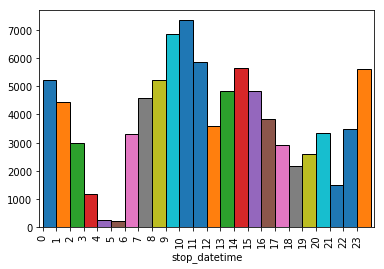

In [116]:
ri.groupby(ri.stop_datetime.dt.hour).dummy.sum().plot(kind='bar', width=1, align='edge', edgecolor='k')

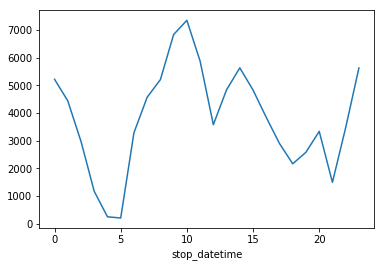

In [117]:
ri.groupby(ri.stop_datetime.dt.hour).dummy.sum().plot()

---
---

In [118]:
ri.stop_datetime.dt.hour.value_counts()

10    7350
9     6838
11    5877
14    5634
23    5629
0     5221
8     5210
13    4842
15    4832
7     4572
1     4442
16    3844
12    3582
22    3473
20    3340
6     3290
2     2975
17    2900
19    2587
18    2168
21    1499
3     1172
4      254
5      210
Name: stop_datetime, dtype: int64

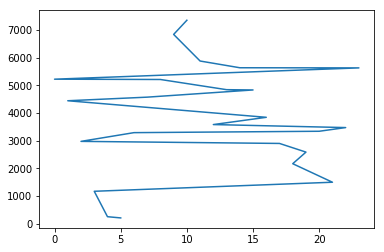

In [119]:
ri.stop_datetime.dt.hour.value_counts().plot()

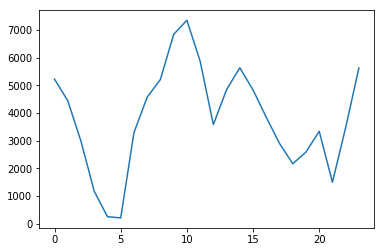

In [120]:
ri.stop_datetime.dt.hour.value_counts().sort_index().plot()

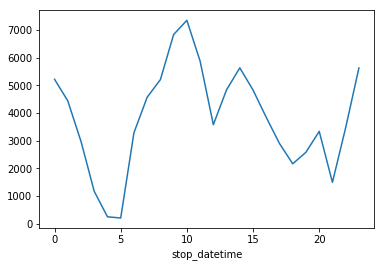

In [121]:
# alternative method
ri.groupby(ri.stop_datetime.dt.hour).stop_date.count().plot()

In [125]:
ri[(ri.stop_datetime.dt.hour > 4) & (ri.stop_datetime.dt.hour < 22)].shape

(68575, 17)

In [126]:
ri.shape

(91741, 17)

In [133]:
ri[(ri.stop_datetime.dt.hour < 4) | (ri.stop_datetime.dt.hour > 22)].shape

(19439, 17)

In [137]:
ri.stop_datetime.dt.hour.value_counts().sort_index()

0     5221
1     4442
2     2975
3     1172
4      254
5      210
6     3290
7     4572
8     5210
9     6838
10    7350
11    5877
12    3582
13    4842
14    5634
15    4832
16    3844
17    2900
18    2168
19    2587
20    3340
21    1499
22    3473
23    5629
Name: stop_datetime, dtype: int64

# IF WE CROSS OVER THE MIDNIGHT THRESHOLD, WE NEED TO USE THE OR SYMBOL.
# IF WE DON'T, WE NEED TO USE THE AND SYMBOL. 

In [167]:
daytime_counts = ri[(ri.stop_datetime.dt.hour > 4) & (ri.stop_datetime.dt.hour < 22)].shape[0]
daytime_counts

68575

In [168]:
nighttime_counts = ri[(ri.stop_datetime.dt.hour < 4) | (ri.stop_datetime.dt.hour > 22)].shape[0]
nighttime_counts

19439

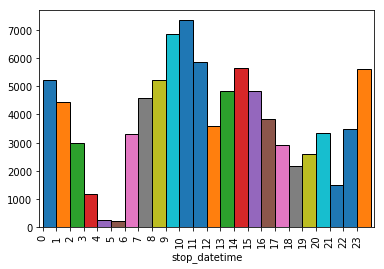

In [169]:
ri.groupby(ri.stop_datetime.dt.hour).dummy.sum().plot(kind='bar', width=1, align='edge', edgecolor='k')

Lessons:

- Be conscious of sorting when plotting

## 9. Find the bad data in the stop_duration column and fix it ([video](https://www.youtube.com/watch?v=8U8ob9bXakY&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=10))

In [268]:
# ri stands for Rhode Island
ri = pd.read_csv('police.csv')
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)


In [269]:
# this won't show us the nan
ri.stop_duration.value_counts()

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [270]:
# there are 5333 rows with nan in stop_duration
ri.stop_duration.isna().sum()

5333

In [271]:
# this will show us that nan exists, but no counts. 
ri.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min', nan, '2', '1'], dtype=object)

In [272]:
# the view_counts has an option to show the nan 
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [273]:
ri[ri.stop_duration.isna() == False].shape

(86408, 16)

In [274]:
ri[ri.stop_duration.isna() == True].shape

(5333, 16)

In [275]:
ri.shape

(91741, 16)

In [276]:
# Identifying the '1' and '2' entries that we wish the replace with np.nan
# There is one of each. 
idx1 = ri.loc[ri.stop_duration == '1', :].index[0]
idx2 = ri.loc[ri.stop_duration == '2', :].index[0]
print(idx1, idx2)

76624 55873


In [279]:
ri[ri.stop_duration == '1'].stop_duration, ri[ri.stop_duration == '2'].stop_duration

(76624    1
 Name: stop_duration, dtype: object, 55873    2
 Name: stop_duration, dtype: object)

In [280]:
# We won't take the intermediate step of identifying the columns. We do that whinin the replacement. 
# REPLACING '1' AND '2' WITH np.nan

ri.stop_duration.replace(to_replace=ri[ri.stop_duration == '1'].stop_duration, value=np.nan, inplace=True)
ri.stop_duration.replace(to_replace=ri[ri.stop_duration == '2'].stop_duration, value=np.nan, inplace=True)

In [281]:
# both series are empty now because they have nan in them. 
ri[ri.stop_duration == '1'].stop_duration, ri[ri.stop_duration == '2'].stop_duration

(Series([], Name: stop_duration, dtype: object),
 Series([], Name: stop_duration, dtype: object))

In [284]:
# mark bad data as missing
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64

---
---

In [307]:
# ri stands for Rhode Island
ri = pd.read_csv('police.csv')
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)

ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [308]:
# In one step, this works:
ri.loc[(ri.stop_duration == '1') | (ri.stop_duration == '2'), 'stop_duration'] = np.nan

In [309]:
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64

In [313]:
# ri stands for Rhode Island
ri = pd.read_csv('police.csv')
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [314]:
# another one step method
ri.stop_duration.replace(['1', '2'], value=np.nan, inplace=True)

ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64

---
---

#### Step by step, from the video

In [315]:
# ri stands for Rhode Island
ri = pd.read_csv('police.csv')
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)

In [287]:
# what four things are wrong with this code?
ri[ri.stop_duration == 1 | ri.stop_duration == 2].stop_duration = 'NaN'

TypeError: cannot compare a dtyped [object] array with a scalar of type [bool]

In [316]:
# what two things are still wrong with this code?
ri[(ri.stop_duration == '1') | (ri.stop_duration == '2')].stop_duration = 'NaN'

/Users/kimzoldak/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [317]:
# assignment statement did not work
ri.stop_duration.value_counts()

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [318]:
# solves SettingWithCopyWarning
ri.loc[(ri.stop_duration == '1') | (ri.stop_duration == '2'), 'stop_duration'] = 'NaN'

In [319]:
# confusing!
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
NaN              2
Name: stop_duration, dtype: int64

In [320]:
# replace 'NaN' string with actual NaN value
import numpy as np
ri.loc[ri.stop_duration == 'NaN', 'stop_duration'] = np.nan

In [321]:
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64

In [322]:
# alternative method
ri.stop_duration.replace(['1', '2'], value=np.nan, inplace=True)

Lessons:

- Ambiguous data should be marked as missing
- Don't ignore the SettingWithCopyWarning
- NaN is not a string

## 10. What is the mean stop_duration for each violation_raw?

In [323]:
ri.stop_duration.head()

0     0-15 Min
1     0-15 Min
2     0-15 Min
3    16-30 Min
4     0-15 Min
Name: stop_duration, dtype: object

In [324]:
ri.violation_raw.unique()

array(['Speeding', 'Call for Service', 'Equipment/Inspection Violation',
       'Other Traffic Violation', nan, 'Registration Violation',
       'Special Detail/Directed Patrol', 'APB',
       'Violation of City/Town Ordinance', 'Suspicious Person',
       'Motorist Assist/Courtesy', 'Warrant', 'Seatbelt Violation'],
      dtype=object)

We want all the strings to be returned as True and all the np.nan to be returned as False.
The pd.notnull function does this. 
This way, we can sum the number of actual entries for each stop_duration under each vioplation_raw. 

Create a 'stop_duration_bool' column and fill it will True and False to represent the entries and the missing data, respectively. 

Then group by violation_raw and then stop_duration to make a MultiIndex data frame. 
The values we want to show in this MultiIndex table is the sum of True values in the stop_duration_bool column. 


In [395]:
pd.notnull('s'), pd.notnull(0), pd.notnull(1), pd.notnull(np.nan)

(True, True, True, False)

In [393]:
ri['stop_duration_bool'] = ri.stop_duration.apply(pd.notnull)

In [394]:
ri.groupby(['violation_raw','stop_duration']).stop_duration_bool.sum()

violation_raw                     stop_duration
APB                               0-15 Min            37.0
                                  16-30 Min           24.0
                                  30+ Min             18.0
Call for Service                  0-15 Min           547.0
                                  16-30 Min          435.0
                                  30+ Min            316.0
Equipment/Inspection Violation    0-15 Min          9173.0
                                  16-30 Min         1373.0
                                  30+ Min            474.0
Motorist Assist/Courtesy          0-15 Min           119.0
                                  16-30 Min           59.0
                                  30+ Min             25.0
Other Traffic Violation           0-15 Min         11763.0
                                  16-30 Min         3150.0
                                  30+ Min           1310.0
Registration Violation            0-15 Min          2421.0
        

In [396]:
ri.groupby(['violation_raw','stop_duration']).stop_duration_bool.sum().unstack()

stop_duration,0-15 Min,16-30 Min,30+ Min
violation_raw,,,
APB,37.0,24.0,18.0
Call for Service,547.0,435.0,316.0
Equipment/Inspection Violation,9173.0,1373.0,474.0
Motorist Assist/Courtesy,119.0,59.0,25.0
Other Traffic Violation,11763.0,3150.0,1310.0
Registration Violation,2421.0,804.0,207.0
Seatbelt Violation,2665.0,249.0,38.0
Special Detail/Directed Patrol,1622.0,613.0,220.0
Speeding,41014.0,6848.0,600.0


#### This can also be done as  a pivot_table

In [401]:
# pivot_table already comes unstacked
ri.pivot_table(values='stop_duration_bool', index='violation_raw', columns='stop_duration', aggfunc='sum')

stop_duration,0-15 Min,16-30 Min,30+ Min
violation_raw,,,
APB,37.0,24.0,18.0
Call for Service,547.0,435.0,316.0
Equipment/Inspection Violation,9173.0,1373.0,474.0
Motorist Assist/Courtesy,119.0,59.0,25.0
Other Traffic Violation,11763.0,3150.0,1310.0
Registration Violation,2421.0,804.0,207.0
Seatbelt Violation,2665.0,249.0,38.0
Special Detail/Directed Patrol,1622.0,613.0,220.0
Speeding,41014.0,6848.0,600.0


In [403]:
# stack it
ri.pivot_table(values='stop_duration_bool', index='violation_raw', 
               columns='stop_duration', aggfunc='sum').stack()

violation_raw                     stop_duration
APB                               0-15 Min            37.0
                                  16-30 Min           24.0
                                  30+ Min             18.0
Call for Service                  0-15 Min           547.0
                                  16-30 Min          435.0
                                  30+ Min            316.0
Equipment/Inspection Violation    0-15 Min          9173.0
                                  16-30 Min         1373.0
                                  30+ Min            474.0
Motorist Assist/Courtesy          0-15 Min           119.0
                                  16-30 Min           59.0
                                  30+ Min             25.0
Other Traffic Violation           0-15 Min         11763.0
                                  16-30 Min         3150.0
                                  30+ Min           1310.0
Registration Violation            0-15 Min          2421.0
        

In [424]:
# same as using sum function, but in integers.
ri.pivot_table(values='stop_duration_bool', index='violation_raw', 
               columns='stop_duration', aggfunc='count')

stop_duration,0-15 Min,16-30 Min,30+ Min
violation_raw,,,
APB,37,24,18
Call for Service,547,435,316
Equipment/Inspection Violation,9173,1373,474
Motorist Assist/Courtesy,119,59,25
Other Traffic Violation,11763,3150,1310
Registration Violation,2421,804,207
Seatbelt Violation,2665,249,38
Special Detail/Directed Patrol,1622,613,220
Speeding,41014,6848,600


In [427]:
np.mean([0,15]), np.mean([16,30]), np.mean([30,60])

(7.5, 23.0, 45.0)

---
---

#### Our above solution doesn't work since it counts the number of times. We want to take the mean of the duration times the number of counts that fall within each respective duration. 

#### To fix this, don't make a boolean column, but make a mean duration column. 

In [440]:
mapping = ri.stop_duration.map({'0-15 Min':8, '16-30 Min':23, '30+ Min':45})

In [441]:
ri['stop_duration_map'] = mapping

#### The mean stop_duration for each type of violation is the mean of all the means. 

For example, if we have 3 stops and each have a duraiton falling between 0-15 mins, the mean of each is 8. 
Since we have 3 stops, we have [8,8,8].

The mean of that list will, obviously, be 8!

Thus, we need to take the mean of the list of mean durations that are stored under each violation type. 


In [456]:
ri.groupby('violation_raw').stop_duration_map.mean()

violation_raw
APB                                 20.987342
Call for Service                    22.034669
Equipment/Inspection Violation      11.460345
Motorist Assist/Courtesy            16.916256
Other Traffic Violation             13.900265
Registration Violation              13.745629
Seatbelt Violation                   9.741531
Special Detail/Directed Patrol      15.061100
Speeding                            10.577690
Suspicious Person                   18.750000
Violation of City/Town Ordinance    13.388626
Warrant                             21.400000
Name: stop_duration_map, dtype: float64

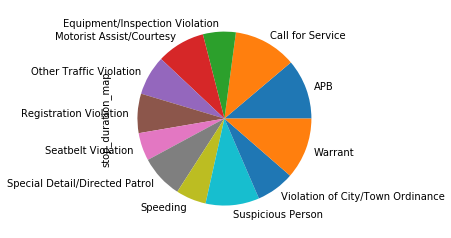

In [457]:
ri.groupby('violation_raw').stop_duration_map.mean().plot('pie')

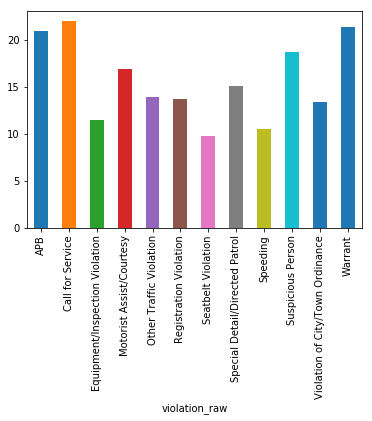

In [458]:
ri.groupby('violation_raw').stop_duration_map.mean().plot('bar')

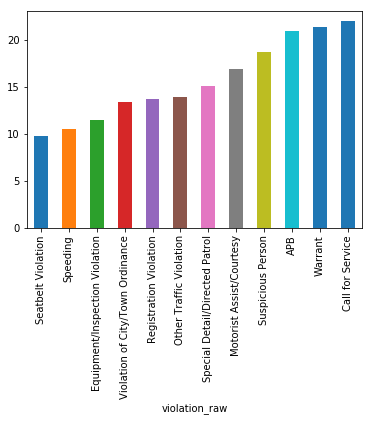

In [528]:
ri.groupby('violation_raw').stop_duration_map.mean().sort_values().plot('bar')

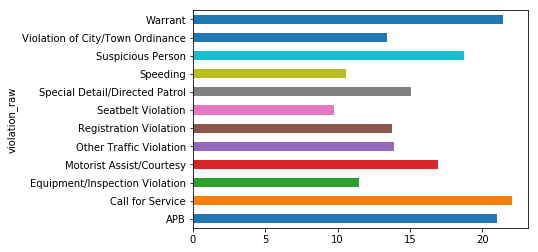

In [468]:
ri.groupby('violation_raw').stop_duration_map.mean().plot('barh')

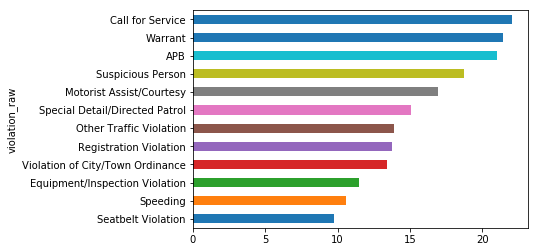

In [529]:
ri.groupby('violation_raw').stop_duration_map.mean().sort_values().plot('barh')

In [472]:
ri.groupby(['violation_raw','stop_duration']).stop_duration_map.count().unstack()

stop_duration,0-15 Min,16-30 Min,30+ Min
violation_raw,,,
APB,37,24,18
Call for Service,547,435,316
Equipment/Inspection Violation,9173,1373,474
Motorist Assist/Courtesy,119,59,25
Other Traffic Violation,11763,3150,1310
Registration Violation,2421,804,207
Seatbelt Violation,2665,249,38
Special Detail/Directed Patrol,1622,613,220
Speeding,41014,6848,600


Text(0.5, 0, 'Violation Type')

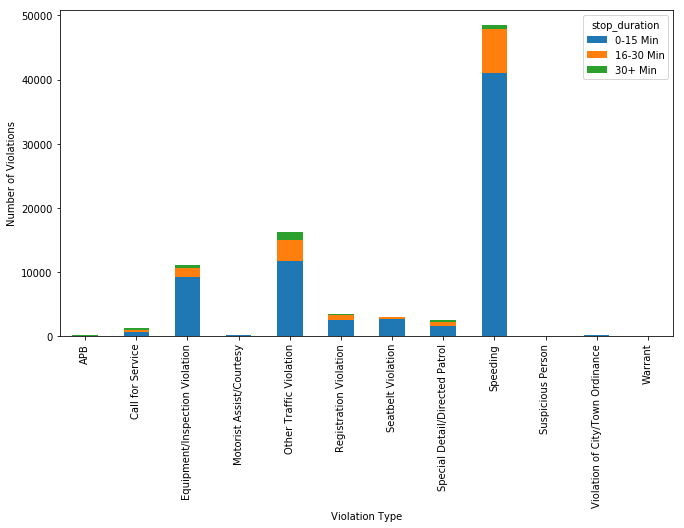

In [495]:
ri.groupby(['violation_raw','stop_duration']).stop_duration_map.count().unstack().plot(kind='bar', 
                                                                                      stacked=True,
                                                                                      figsize=(11,6))
plt.ylabel('Number of Violations')
plt.xlabel('Violation Type')

Although the mean tells us that the mean duration of each type of violation. However, a stacked bar plot shows us the frequency of violations at each duration span. 

We see the vast majority of all stops, regardless of violation, are less than 15 minutes. 

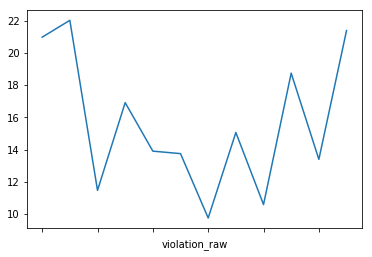

In [460]:
ri.groupby('violation_raw').stop_duration_map.mean().plot('')

In [496]:
# Total (average) amount of time spent at each type of stop. 
ri.groupby('violation_raw').stop_duration_map.count()

violation_raw
APB                                    79
Call for Service                     1298
Equipment/Inspection Violation      11020
Motorist Assist/Courtesy              203
Other Traffic Violation             16223
Registration Violation               3432
Seatbelt Violation                   2952
Special Detail/Directed Patrol       2455
Speeding                            48462
Suspicious Person                      56
Violation of City/Town Ordinance      211
Warrant                                15
Name: stop_duration_map, dtype: int64

In [497]:
ri.groupby('violation_raw').stop_duration_map.mean()

violation_raw
APB                                 20.987342
Call for Service                    22.034669
Equipment/Inspection Violation      11.460345
Motorist Assist/Courtesy            16.916256
Other Traffic Violation             13.900265
Registration Violation              13.745629
Seatbelt Violation                   9.741531
Special Detail/Directed Patrol      15.061100
Speeding                            10.577690
Suspicious Person                   18.750000
Violation of City/Town Ordinance    13.388626
Warrant                             21.400000
Name: stop_duration_map, dtype: float64

---
---

In [498]:
# make sure you create this column
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}
ri['stop_minutes'] = ri.stop_duration.map(mapping)

In [499]:
# matches value_counts for stop_duration
ri.stop_minutes.value_counts()

8.0     69543
23.0    13635
45.0     3228
Name: stop_minutes, dtype: int64

In [500]:
ri.groupby('violation_raw').stop_minutes.mean()

violation_raw
APB                                 20.987342
Call for Service                    22.034669
Equipment/Inspection Violation      11.460345
Motorist Assist/Courtesy            16.916256
Other Traffic Violation             13.900265
Registration Violation              13.745629
Seatbelt Violation                   9.741531
Special Detail/Directed Patrol      15.061100
Speeding                            10.577690
Suspicious Person                   18.750000
Violation of City/Town Ordinance    13.388626
Warrant                             21.400000
Name: stop_minutes, dtype: float64

In [501]:
ri.groupby('violation_raw').stop_minutes.agg(['mean', 'count'])

,mean,count
violation_raw,,
APB,20.987342,79
Call for Service,22.034669,1298
Equipment/Inspection Violation,11.460345,11020
Motorist Assist/Courtesy,16.916256,203
Other Traffic Violation,13.900265,16223
Registration Violation,13.745629,3432
Seatbelt Violation,9.741531,2952
Special Detail/Directed Patrol,15.061100,2455
Speeding,10.577690,48462


In [503]:
ri.stop_minutes.agg(['mean', 'count'])

mean        11.749288
count    86406.000000
Name: stop_minutes, dtype: float64

In [504]:
?ri.stop_minutes.agg

In [505]:
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_datetime,stop_duration_bool,stop_duration_map,stop_minutes
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-02 01:55:00,True,8.0,8.0
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-18 08:15:00,True,8.0,8.0
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-23 23:15:00,True,8.0,8.0
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005-02-20 17:15:00,True,23.0,23.0
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-03-14 10:00:00,True,8.0,8.0


In [507]:
ri.driver_age.head()

0    20.0
1    40.0
2    33.0
3    19.0
4    21.0
Name: driver_age, dtype: float64

In [511]:
def rng(x):
    return max(x) - min(x)

In [518]:
ri.driver_age.agg(['mean', 'min', 'max', 'count', len])

mean        34.011333
min         15.000000
max         99.000000
count    86120.000000
len      91741.000000
Name: driver_age, dtype: float64

In [524]:
ri.driver_age.agg([np.mean, min, max, 'count', len])

mean        34.011333
min         15.000000
max         99.000000
count    86120.000000
len      91741.000000
Name: driver_age, dtype: float64

Lessons:

- Convert strings to numbers for analysis
- Approximate when necessary
- Use count with mean to looking for meaningless means

## 11. Plot the results of the first groupby from the previous exercise

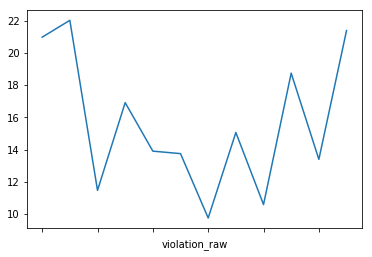

In [525]:
# what's wrong with this?
ri.groupby('violation_raw').stop_minutes.mean().plot()

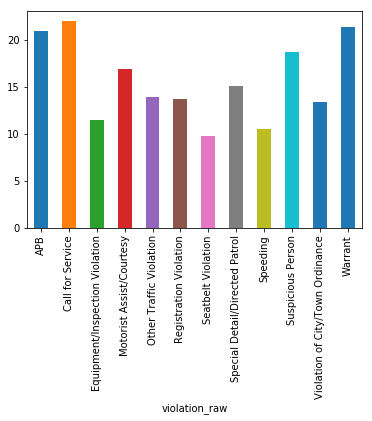

In [526]:
# how could this be made better?
ri.groupby('violation_raw').stop_minutes.mean().plot(kind='bar')

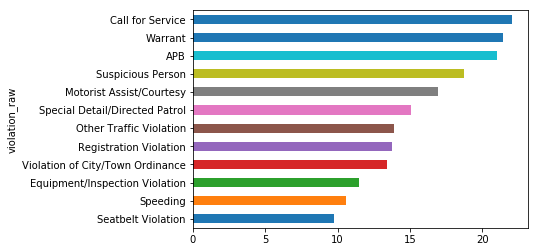

In [527]:
ri.groupby('violation_raw').stop_minutes.mean().sort_values().plot(kind='barh')

Lessons:

- Don't use a line plot to compare categories
- Be conscious of sorting and orientation when plotting

## 12. Compare the age distributions for each violation

In [530]:
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_datetime,stop_duration_bool,stop_duration_map,stop_minutes
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-02 01:55:00,True,8.0,8.0
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-18 08:15:00,True,8.0,8.0
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-23 23:15:00,True,8.0,8.0
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005-02-20 17:15:00,True,23.0,23.0
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-03-14 10:00:00,True,8.0,8.0


In [532]:
ri.groupby('violation_raw').driver_age.mean()

violation_raw
APB                                 36.179487
Call for Service                    34.084627
Equipment/Inspection Violation      31.781503
Motorist Assist/Courtesy            36.518519
Other Traffic Violation             36.120020
Registration Violation              32.803035
Seatbelt Violation                  32.206301
Special Detail/Directed Patrol      43.430561
Speeding                            33.530097
Suspicious Person                   33.259259
Violation of City/Town Ordinance    35.222749
Warrant                             31.533333
Name: driver_age, dtype: float64

In [533]:
ri.groupby('violation_raw').driver_age.agg(['mean', 'min', 'max', 'median', 'count'])

,mean,min,max,median,count
violation_raw,,,,,
APB,36.179487,18.0,72.0,34.5,78
Call for Service,34.084627,16.0,87.0,30.0,1288
Equipment/Inspection Violation,31.781503,16.0,89.0,28.0,11007
Motorist Assist/Courtesy,36.518519,17.0,70.0,35.0,189
Other Traffic Violation,36.120020,15.0,99.0,33.0,16164
Registration Violation,32.803035,16.0,74.0,30.0,3427
Seatbelt Violation,32.206301,17.0,77.0,29.0,2952
Special Detail/Directed Patrol,43.430561,17.0,78.0,44.0,2369
Speeding,33.530097,15.0,90.0,30.0,48361


In [535]:
# good first step
ri.groupby('violation_raw').driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation_raw,,,,,,,,
APB,78.0,36.179487,12.295859,18.0,26.00,34.5,43.75,72.0
Call for Service,1288.0,34.084627,13.268718,16.0,24.00,30.0,43.00,87.0
Equipment/Inspection Violation,11007.0,31.781503,11.400900,16.0,23.00,28.0,38.00,89.0
Motorist Assist/Courtesy,189.0,36.518519,12.789038,17.0,25.00,35.0,47.00,70.0
Other Traffic Violation,16164.0,36.120020,13.185805,15.0,25.00,33.0,46.00,99.0
Registration Violation,3427.0,32.803035,11.033675,16.0,24.00,30.0,40.00,74.0
Seatbelt Violation,2952.0,32.206301,11.213122,17.0,24.00,29.0,38.00,77.0
Special Detail/Directed Patrol,2369.0,43.430561,11.542058,17.0,35.00,44.0,52.00,78.0
Speeding,48361.0,33.530097,12.821847,15.0,23.00,30.0,42.00,90.0


In [534]:
# good first step
ri.groupby('violation').driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,11007.0,31.781503,11.400900,16.0,23.0,28.0,38.0,89.0
Moving violation,16164.0,36.120020,13.185805,15.0,25.0,33.0,46.0,99.0
Other,4204.0,39.536870,13.034639,16.0,28.0,39.0,49.0,87.0
Registration/plates,3427.0,32.803035,11.033675,16.0,24.0,30.0,40.0,74.0
Seat belt,2952.0,32.206301,11.213122,17.0,24.0,29.0,38.0,77.0
Speeding,48361.0,33.530097,12.821847,15.0,23.0,30.0,42.0,90.0


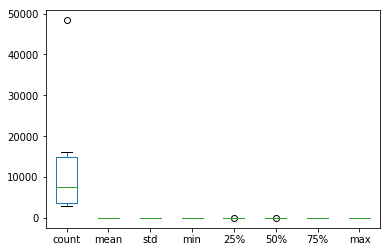

In [537]:
ri.groupby('violation').driver_age.describe().plot(kind='box') #.boxplot(data)

In [575]:
k = ri.groupby('violation').driver_age

In [ ]:
k.

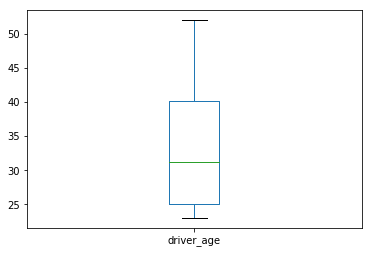

In [582]:
ri.groupby('violation_raw').driver_age.quantile([.25, .5, .75]).plot('box')

In [579]:
ri.groupby('violation_raw').driver_age.describe(percentiles=[.25, .5, .75, .95])

,count,mean,std,min,25%,50%,75%,95%,max
violation_raw,,,,,,,,,
APB,78.0,36.179487,12.295859,18.0,26.00,34.5,43.75,57.15,72.0
Call for Service,1288.0,34.084627,13.268718,16.0,24.00,30.0,43.00,59.00,87.0
Equipment/Inspection Violation,11007.0,31.781503,11.400900,16.0,23.00,28.0,38.00,55.00,89.0
Motorist Assist/Courtesy,189.0,36.518519,12.789038,17.0,25.00,35.0,47.00,61.00,70.0
Other Traffic Violation,16164.0,36.120020,13.185805,15.0,25.00,33.0,46.00,60.00,99.0
Registration Violation,3427.0,32.803035,11.033675,16.0,24.00,30.0,40.00,54.00,74.0
Seatbelt Violation,2952.0,32.206301,11.213122,17.0,24.00,29.0,38.00,55.00,77.0
Special Detail/Directed Patrol,2369.0,43.430561,11.542058,17.0,35.00,44.0,52.00,62.00,78.0
Speeding,48361.0,33.530097,12.821847,15.0,23.00,30.0,42.00,58.00,90.0


In [ ]:
ri.groupby('violation_raw').driver_age.agg(['mean', 'min', 'max', 'median', 'count'])

In [593]:
k= ri.groupby('violation_raw').driver_age.value_counts()

In [592]:
?np.quantile()

In [596]:
def qtl25():
    return np.percentile(a=ri.groupby('violation_raw').driver_age.value_counts(), q=25)

In [598]:
qtl25()

3.0

In [601]:
ri.groupby('violation_raw').driver_age.apply(lambda x: np.percentile(a=x, q=25))

/Users/kimzoldak/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


violation_raw
APB                                  NaN
Call for Service                     NaN
Equipment/Inspection Violation       NaN
Motorist Assist/Courtesy             NaN
Other Traffic Violation              NaN
Registration Violation               NaN
Seatbelt Violation                  24.0
Special Detail/Directed Patrol       NaN
Speeding                             NaN
Suspicious Person                    NaN
Violation of City/Town Ordinance    24.0
Warrant                             24.0
Name: driver_age, dtype: float64

In [553]:
ri.driver_age.describe(percentiles=[.25, .5, .75, .95])

count    86120.000000
mean        34.011333
std         12.738564
min         15.000000
25%         23.000000
50%         31.000000
75%         43.000000
95%         58.000000
max         99.000000
Name: driver_age, dtype: float64

In [602]:
# good first step
ri.groupby('violation').driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,11007.0,31.781503,11.400900,16.0,23.0,28.0,38.0,89.0
Moving violation,16164.0,36.120020,13.185805,15.0,25.0,33.0,46.0,99.0
Other,4204.0,39.536870,13.034639,16.0,28.0,39.0,49.0,87.0
Registration/plates,3427.0,32.803035,11.033675,16.0,24.0,30.0,40.0,74.0
Seat belt,2952.0,32.206301,11.213122,17.0,24.0,29.0,38.0,77.0
Speeding,48361.0,33.530097,12.821847,15.0,23.0,30.0,42.0,90.0


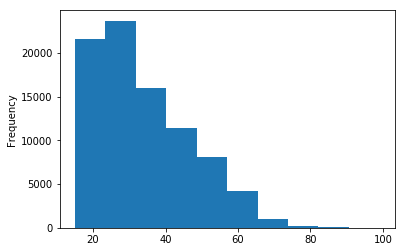

In [603]:
# histograms are excellent for displaying distributions
ri.driver_age.plot(kind='hist')

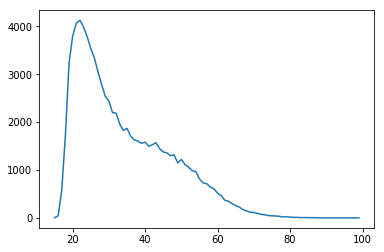

In [604]:
# similar to a histogram
ri.driver_age.value_counts().sort_index().plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13081ab38>,
      dtype=object)

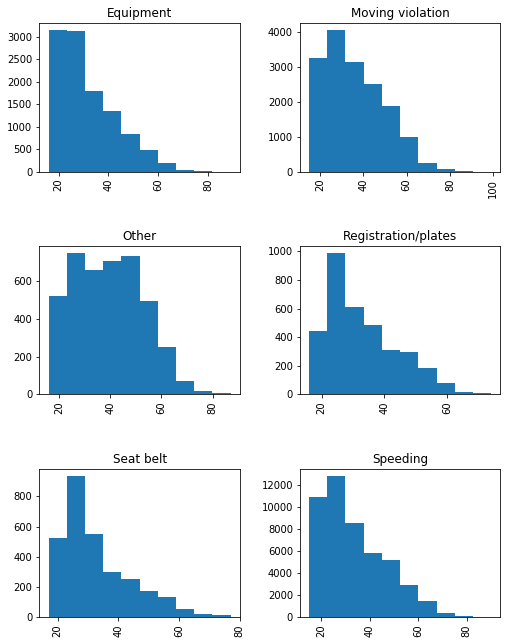

In [610]:
# can't use the plot method
ri.hist('driver_age', by='violation', figsize=(8,11))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x130eb2898>,
      dtype=object)

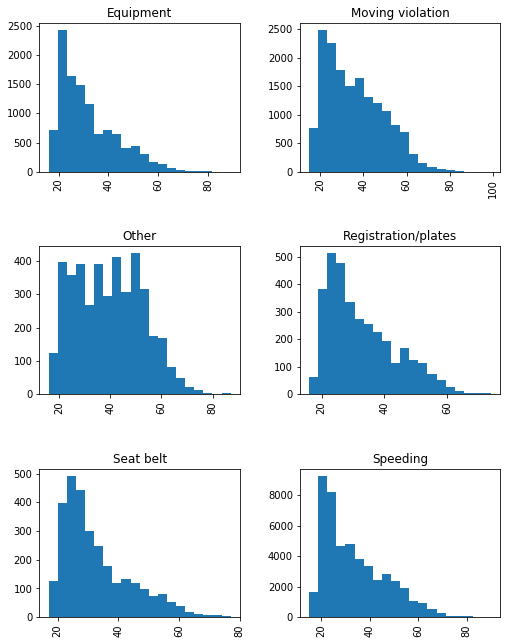

In [612]:
ri.hist('driver_age', by='violation', bins=20, figsize=(8,11))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1319389e8>,
      dtype=object)

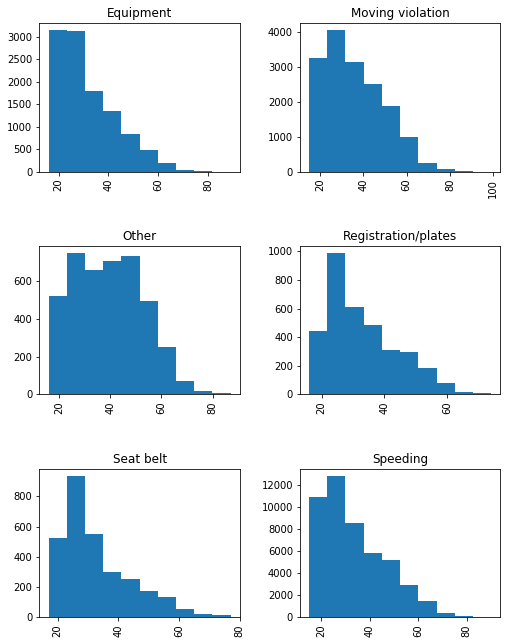

In [615]:
ri.hist('driver_age', by='violation', figsize=(8,11))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1328ccbe0>,
      dtype=object)

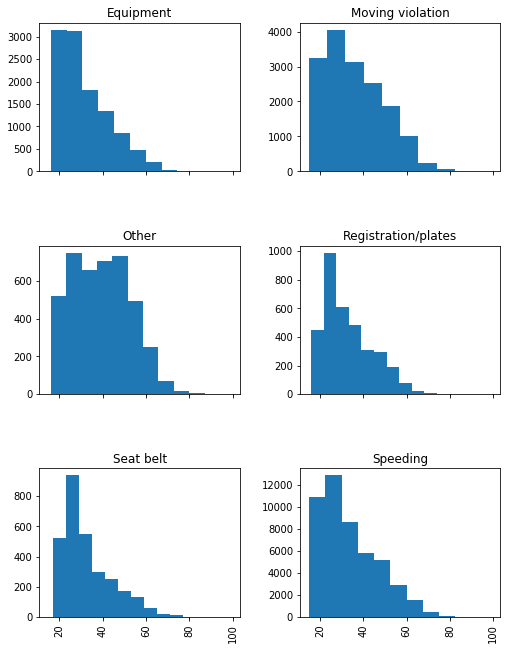

In [621]:
# what changed? how is this better or worse?
ri.hist('driver_age', by='violation', sharex=True, figsize=(8,11) )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1325d6208>,
      dtype=object)

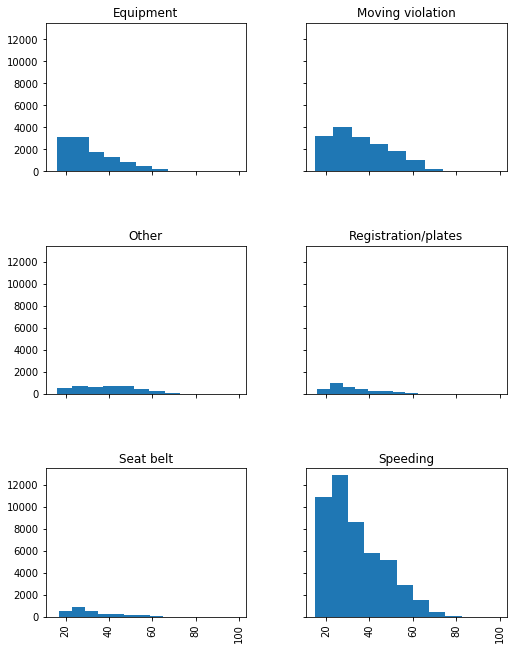

In [618]:
# what changed? how is this better or worse?
ri.hist('driver_age', by='violation', sharex=True, sharey=True, figsize=(8,11))

Lessons:

- Use histograms to show distributions
- Be conscious of axes when using grouped plots

## 13. Pretend you don't have the driver_age column, and create it from driver_age_raw (and call it new_age)

In [622]:
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_datetime,stop_duration_bool,stop_duration_map,stop_minutes
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-02 01:55:00,True,8.0,8.0
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-18 08:15:00,True,8.0,8.0
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-23 23:15:00,True,8.0,8.0
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005-02-20 17:15:00,True,23.0,23.0
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-03-14 10:00:00,True,8.0,8.0


In [646]:
ri['new_age'] = ri.stop_datetime.dt.year - ri.driver_age_raw

Can't do:

    ri['new_age'] = 2018 - ri.driver_age_raw
    
Because we want the drivers age at the DATE AND TIME they were pulled over.



In [633]:
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_datetime,stop_duration_bool,stop_duration_map,stop_minutes,new_age
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-02 01:55:00,True,8.0,8.0,20.0
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-18 08:15:00,True,8.0,8.0,40.0
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-23 23:15:00,True,8.0,8.0,33.0
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005-02-20 17:15:00,True,23.0,23.0,19.0
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-03-14 10:00:00,True,8.0,8.0,21.0


In [634]:
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_datetime,stop_duration_bool,stop_duration_map,stop_minutes,new_age
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-02 01:55:00,True,8.0,8.0,20.0
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-18 08:15:00,True,8.0,8.0,40.0
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-23 23:15:00,True,8.0,8.0,33.0
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005-02-20 17:15:00,True,23.0,23.0,19.0
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-03-14 10:00:00,True,8.0,8.0,21.0


In [635]:
# appears to be year of stop_date minus driver_age_raw
ri.tail()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_datetime,stop_duration_bool,stop_duration_map,stop_minutes,new_age
91736,2015-12-31,20:27,NaN,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False,2015-12-31 20:27:00,True,8.0,8.0,29.0
91737,2015-12-31,20:35,NaN,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,2015-12-31 20:35:00,True,8.0,8.0,33.0
91738,2015-12-31,20:45,NaN,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False,2015-12-31 20:45:00,True,8.0,8.0,23.0
91739,2015-12-31,21:42,NaN,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2015-12-31 21:42:00,True,8.0,8.0,22.0
91740,2015-12-31,22:46,NaN,M,1959.0,56.0,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2015-12-31 22:46:00,True,8.0,8.0,56.0


In [647]:
ri.driver_age_raw.head()

0    1985.0
1    1965.0
2    1972.0
3    1986.0
4    1984.0
Name: driver_age_raw, dtype: float64

In [648]:
ri.new_age.head()

0    20.0
1    40.0
2    33.0
3    19.0
4    21.0
Name: new_age, dtype: float64

In [649]:
ri.driver_age.head()

0    20.0
1    40.0
2    33.0
3    19.0
4    21.0
Name: driver_age, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1341a7be0>,
      dtype=object)

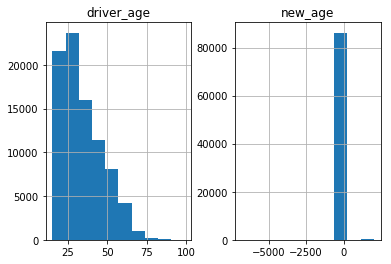

In [650]:
# compare the distributions
ri[['driver_age', 'new_age']].hist()

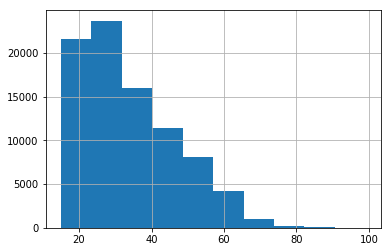

In [643]:
ri.driver_age.hist()

In [652]:
ri.driver_age_raw.unique()

array([1985., 1965., 1972., 1986., 1984., 1982., 1969., 1970., 1979.,
       1966., 1955., 1958., 1953., 1967.,   nan, 1964., 1977., 1959.,
       1973., 1947., 1978., 1962., 1981., 1988., 1983., 1961., 1957.,
       1971., 1950., 1954., 1960., 1976., 1974., 1968., 1938., 1980.,
       1963., 1975., 1987., 1948., 1956., 1944., 1935.,    0., 1952.,
       1945., 1946., 1941., 1942., 1951., 1949., 2005., 1939., 1943.,
       1936., 1924., 1937., 1929., 1930., 1931., 1923., 1940., 1933.,
       1989., 1928., 1932., 1990., 1926., 2006., 1927., 1997., 1934.,
       1887., 1925., 1918., 2004., 1991., 2002., 2007., 1992., 8801.,
       2001., 2003., 1998., 1922., 1993., 2008., 2009., 2919., 2000.,
       1994., 1995., 2011., 1996., 2013., 1914., 1920., 1999.])

In [653]:
ri.stop_datetime.dt.year.unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])

In [ ]:
ri.stop_datetime.dt.year - ri.driver_age_raw

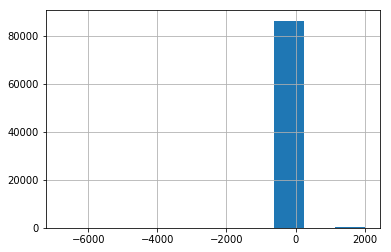

In [644]:
ri.new_age.hist()

In [640]:
# compare the summary statistics (focus on min and max)
ri[['driver_age', 'new_age']].describe()

,driver_age,new_age
count,86120.000000,86414.000000
mean,34.011333,39.784294
std,12.738564,110.822145
min,15.000000,-6794.000000
25%,23.000000,24.000000
50%,31.000000,31.000000
75%,43.000000,43.000000
max,99.000000,2015.000000


In [654]:
# calculate how many ages are outside that range
ri[(ri.new_age < 15) | (ri.new_age > 99)].shape

(294, 20)

In [655]:
# raw data given to the researchers
ri.driver_age_raw.isnull().sum()

5327

In [656]:
# age computed by the researchers (has more missing values)
ri.driver_age.isnull().sum()

5621

In [657]:
# what does this tell us? researchers set driver_age as missing if less than 15 or more than 99
5621-5327

294

In [659]:
# driver_age_raw NOT MISSING, driver_age MISSING
ri[(ri.driver_age_raw.notnull()) & (ri.driver_age.isnull())].head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_datetime,stop_duration_bool,stop_duration_map,stop_minutes,new_age
146,2005-10-05,08:50,NaN,M,0.0,NaN,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,2005-10-05 08:50:00,True,8.0,8.0,2005.0
281,2005-10-10,12:05,NaN,F,0.0,NaN,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False,2005-10-10 12:05:00,True,8.0,8.0,2005.0
331,2005-10-12,07:50,NaN,M,0.0,NaN,White,Motorist Assist/Courtesy,Other,False,NaN,No Action,False,0-15 Min,False,2005-10-12 07:50:00,True,8.0,8.0,2005.0
414,2005-10-17,08:32,NaN,M,2005.0,NaN,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,2005-10-17 08:32:00,True,8.0,8.0,0.0
455,2005-10-18,18:30,NaN,F,0.0,NaN,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False,2005-10-18 18:30:00,True,8.0,8.0,2005.0


In [660]:
# set the ages outside that range as missing
ri.loc[(ri.new_age < 15) | (ri.new_age > 99), 'new_age'] = np.nan

In [661]:
ri.new_age.equals(ri.driver_age)

True

Lessons:

- Don't assume that the head and tail are representative of the data
- Columns with missing values may still have bad data (driver_age_raw)
- Data cleaning sometimes involves guessing (driver_age)
- Use histograms for a sanity check